# Health Insurance Automation

The goal of this notebook is to create an automated system to estimate the annual medical expenditure for new customers. 

You can find the link to my Github repository that contains this notebook as well as the medical.csv dataset [here](https://github.com/noahfrank0001/MachineLearningSKLearn). 

This notebook follows a course by [Jovian.](https://www.youtube.com/@jovianhq) that was posted on the [freeCodeCamp YouTube Channel](https://www.youtube.com/watch?v=hDKCxebp88A) titled "Machine Learning with Python and Scikit-Learn". 


Thank you for taking the time to look at this. Feel free to reach out on my [LinkedIn](https://www.linkedin.com/in/noah-frank-032b68230/) if you have any comments/critiques.

<br>

---

In this notebook, we will explore a dataset of customer medical charges for a health insurance company to determine what premiums a given customer should be charged based on certain information. 

In [2]:
# run this cell if you are running in a notebook on the web. If you are running locally you can run pip in your console/command line. 
# !pip install numpy --quiet
# !pip install pandas --quiet
# !pip install urllib3 --quiet
# !pip install plotly --quiet
# !pip install matplotlib --quiet
# !pip install seaborn --quiet
# !pip install scikit-learn --quiet

In [3]:
import numpy as np
import pandas as pd

## 2 Ways to Get Dataset

### Method 1:

In [4]:
# Both methods require the url for the csv
# note that you need '?raw=true' to get the raw csv
url = "https://github.com/noahfrank0001/MachineLearningSKLearn/blob/main/medical.csv?raw=true" 

In [5]:
medical_df = pd.read_csv(url)
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Method 2:

In [6]:
from urllib.request import urlretrieve

urlretrieve(url, 'medical.csv')

medical_df = pd.read_csv('medical.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


---

## Looking at the dataset

We want to estimate the value in our charges column based on the age, sex, bmi, children, smoker, and region columns.

If we can assume that the historical trends in the dataset apply to future patients, we can predict future charges with a relatively high amount of certainty. 

We will now explore the data to gain a better understanding of the historical trends among customers.   

### Info()

Below we can see the names, count, and data types of the columns: 

In [7]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Notice that we have four numeric columns and three columns of type object.

### Describe()

We can also get a description of the data set using the describe function:

In [8]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


After using this function, we can see that:

* There are 1,338 observations in each column and 0 nulls. 
* The age range for customers is 18-64, so we cannot assume that what we learn here will apply to other customers outside this range. 
* The average BMI is just above 30.
* On average, customers have about 1.1 children.
* The average charge is $13,270, but there is atleast one major outlier at $63,770. 

---

## Exploratory Data Analysis (EDA)

Now its time to explore the data and discover what patterns emerge:

First, we import some libraries for data visualization:

In [9]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# ensures that plots appear within the notebook and not as pop-ups 
%matplotlib inline 

We will change the default style for maplotlib and seaborns:

In [10]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age

Age is numeric and it ranges from 18 to 64. Lets visualize the distribution of the `age` variable:

In [11]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [12]:
fig = px.histogram(medical_df, 
                   x='age',
                   marginal='box', # plots a boxplot above the histogram
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

We can see that the distribution is pretty uniform, outside of the ages 18 and 19. 

### BMI (Body Mass Index)

In [13]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mas Index)')
fig.update_layout(bargap=0.1)
fig.show()

The BMI historgram looks more like a normal distribution, with the count being higher in the middle and trailing off at either end. Looking at the boxplot at the top of the graph, we can also see thatt there are a few outliers, which will skew the mean to the right.  

### Charges

In [14]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker', # split the histogram into smokers and non smokers
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Here, we can see a histogram of annual medical charges for customers. One important thing to notice is that all customers who had charges of $12,000 or less were non smokers, and most of the customers with charges of $18,000 or more were smokers. This seems to indicate that being a smoker significantly increases the chance of a given customer having a higher annual medical bill. This is backed up by the box plot, which shows that the median annual medical charges for non smokers is about $7,300, whereas the median annual medical charges for smokers is around $34,400. 

If you click on "yes" and "no" in the chart legend you can filter out smokers and non-smokers do see their individual histograms. After doing so, we can see that the graph of annual medical charges for smokers is more more evenly distributed than the graph for non-smokers, with rises around teh 20k and 40k marks. Charges for non-smokers decrease up until $15,000 then massively drop and even out after that. 

### Smoker

In [15]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

We can see that the majority of customers are non-smokers. This might indicate that our sample size of smokers is to small, but for our purposes we can assume that we have an adequate dataset.

Now let's look at a histogram of smokers seperated by sex:

In [16]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

It looks like a slight majority of smokers are male but there is a 50/50 split in non-smokers between the sexes. 

### Age and Charges

We can now visualize the relationship between age and charges. A scatterplot is a good tool to use for this. Additionally, we'll also color in the observations to show smokers and non-smokers:

In [17]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can see three distinct groupings of data: 

1. the lowest charges group, comporised completely of non-smokers.
2. A group with medium charges that is comprised of both smokers and non-smokers.
3. The highest charges group, comprised completely of smokers. 

If you split the smokers and no smokers, you can see that both follow a similar trend: there are two distinct groups, one a lower group and one an upper group. The lower group for smokers could be people who smoke but do not have any serious medical issues. The upper group for smokers could be smokers who do have a serius medical issues (i.e. lung cancer). 

One thing to notice is that the smoking cutomer with the lowest annual medical charges in the 18 year old age group is close to the non-smoking customer with the lowest annual medical charges in the 64 year old age group, shown below: 

In [18]:
# 18 year old smoker with lowest medical charges
smoker_18 = medical_df[(medical_df['age'] == 18) & (medical_df['smoker'] == 'yes')]
smoker_18 = smoker_18[smoker_18['charges'] == smoker_18['charges'].min()]

# 64 year old non-smoker with lowest medical charges
non_smoker_64 = medical_df[(medical_df['age'] == 64) & (medical_df['smoker'] == 'no')]
non_smoker_64 = non_smoker_64[non_smoker_64['charges'] == non_smoker_64['charges'].min()]

pd.concat([smoker_18, non_smoker_64])

,age,sex,bmi,children,smoker,region,charges
250,18,male,17.29,2,yes,northeast,12829.4551
335,64,male,34.50,0,no,southwest,13822.8030


However, looking at the output above, we can see that the 18 year old smoker has 2 children. This will have an effect on their overall medical charges, so we can't simply look at their smoker status and assume that tells us the entire picture. 

Another factor to consider is the climate of each customer. The 18 year old lives in the northeast, so it cold most of the year, whereas the 64 year old lives in the southwest, where it is warm and dry most of the year. This will also have some kind of an effect on each customers medical charges. 

---

### BMI and Charges

Now we can visualize the relationship between body mass index (BMI) and charges. We might assume that a higher BMI correlates with a higher annual medical charge, but we can't let any bias get in the way of uncovering what the data is actually telling us. 

In [19]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

This chart reveals a few interesting things:

1. A large mass of non-smokers clusters under the $15,000 mark for charges regardless of BMI.
2. The smokers are split into two disinct clusters for annual charges that are seperated at the 30 BMI mark.
2. The average for the lower of the two clusters (BMI less than 30) in the smoker category is about $25,000, where as the average for the upper cluster (BMI greater than 30) is around $45,000. 

Although BMI may not appear to be a key determining factor in predicting the charges of non-smokers, it does seem to have a major effect on the charges of smoking customers. 

---

### Children vs. Charges

Let's you a violin plot to look at the relationship between number of children and annual medical charges. A violin plot is helpful because number of children is discrete not continuous (a customer cannot have 1.35 children, only whole numbers). On a scatterplot there would be a lot of overlapping points, whereas a violin plot can show us the frequency for the groups: 

In [20]:
px.violin(medical_df, x='children', y='charges')

The customer group with four children has the highest median annual medical charges where as the customer group with three children has the highest third quartile annual medical charges.  

However, there are people who have a low medical cost despite having more children and people who have a high medical cost despite not having any children. We can't necessarily see a concrete trend based on number of children, but a machine learning algorithm might "see" something that our human eyes cannot.  

---

## Correlation

Some columns in the dataset seem to be correlated, meaning that a change in one columns has an effect on the change in another. For instance, a change in age usually means a change in medical charges (the average charge of a 64 year old is higher than the average charge of a 18 year old). 

<b>Overview of correlation</b>

* Strengh: the greater that absolute value of the correlation coefficient the greater the strength.
    * A value <i>close to 1 or -1</i> indicates a strong correlation between the two variables tested.
    * A value <i>close to 0</i> indicates a weak correlation between the two variables tested.
    * The closer a value is to 0 the weaker the correlation. the closer the value is to 1 or -1 (relative to 0) the stronger the correlation.

* Direction: the direction of the correlation can either be positive or negative.
    * A <i>positive</i> correlation indicates that when the value of one variable increases, the value of the other variable increases. When the value of one variable decreases, the value of the other variable also decreases. 
    * A <i>negative</i> correlation indicates that when the value of one variable increases, the value of the other variable decreases. when the value of one variable decreases, the value of the other variable increases. 

Below we will compute the correlation coefficients of variables in the dataset using that `corr` method (part of Pandas):

#### Charges and Age

In [21]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

The correlation coefficient between charges and age is approximately `0.3`, a fairly weak correlation between 0 and 0.5.

#### Charges and BMI

In [22]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

The correlation coefficient between charges and BMI is approximately `0.2`, a slighly weaker correlation, but also between 0 and 0.5. 

This means that charges are more correlated with age than BMI. 

#### Charges and Smoker

In order to compute the correlation between charges and smoker status, we need to convert the smoker variables from text to numbers and add it to our dataframe in order for Pandas to process it properly:

In [23]:
# creating a dictionary where 'no' maps to 0 and 'yes' maps to 1:
smoker_values = {"no": 0, "yes": 1}
# applying our mapping to the smoker variable using the medical dataset and assigning it to a Python variable: 
smoker_numeric = medical_df.smoker.map(smoker_values)

No we can calculate the correlation coefficient for charges and smoker:

In [24]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

The correlation coefficient between charges and smoker status is `0.78`, a strong positive correlation between 0.5 and 1. 

With a coefficient of nearly 0.8, the smoker variable is highly correlated with charges, meaning that it will probably be a good predictor of how much a given customers medical charge will be.

Now that we have looked at correlations between specific variables, we can view a table of all correlations between numerical values in the dataset:

In [25]:
medical_df[['age', 'bmi', 'children', 'charges']].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Let's make a heatmap of the correlation matrix so we can easily visualize what variables have the strongest correlations:

Text(0.5, 1.0, 'Correlation Matrix')

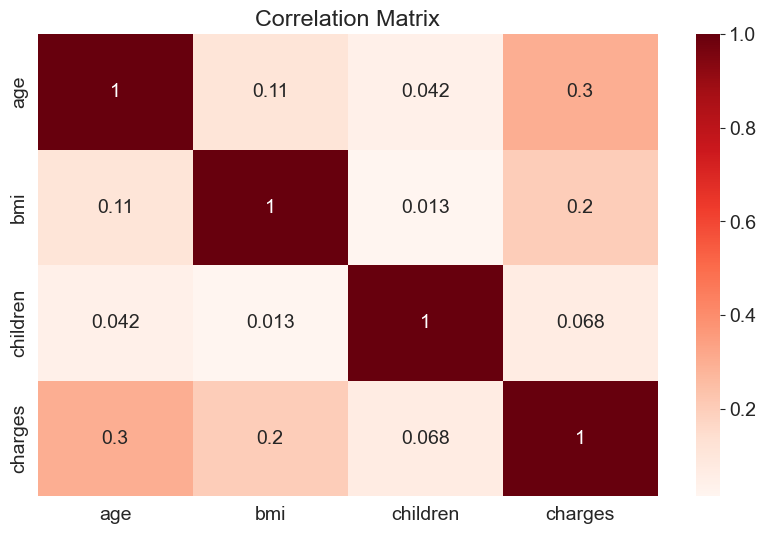

In [26]:
sns.heatmap(medical_df[['age', 'bmi', 'children', 'charges']].corr(), cmap="Reds", annot=True)
plt.title("Correlation Matrix")

Notice that the correlation between charges and age is 0.299, which is what we calculated above. When we look at the scatterplot of age and charges below, we can see that the weakness of this correlation coefficient is noticable because it is difficult to accurately predict a given customers charges based solely on their age:

In [27]:
px.scatter(medical_df, x='age', y='charges')

### Correlation vs Causation 
---

One thing to note while talking about correlation is the often used phrase "correlation does not equal causation". Just because two variables have a high correlation doesn't mean that one variable causes a change in the other variable, only that when there is a change in one variable, there will most likely be a change in the other variable. 

For instance, if a car parts manufacturer looks at a car insurance dataset and discovers that the number of front end accidents and number of bumpers sold is highly correlated, the company cannot assume that reducing the number of bumpers sold will also reduce the number of accidents. 

#### Confounding Variables
>Another thing to consider when it comes to the topic of correlation and causation is a confounding variable affecting the outcome. 

For instance, in a study of the connection between violent video games and violent crime, researchers find that the hours of violent video games played and the likelyhood of committing a violent offence are highly correlated. However, what the researchers didn't take into consideration is that parents of children in this study who use video games to "babysit" their children are more hands off in their parenting. When parents are distant from their children in their adolescence, a child may be more likely to commit violent crimes when they are older. (I'm not saying this is true in the real world, I'm just trying to give a fictional example of a confounding variable). 

In this example, distant parenting would be a confounding variable because it both increases the chance of a child playing a violent video game <b>and</b> increases the chance that a child would go on to commit a violent crime.

## Linear Regression using a Single Feature
---

Based on the correlations that we calculated above we know that smoker and age have the highest correlation with annual medical charges. Let's explore the relationships between the predictor variables (smoker and age) and the outcome variable (charges).

First, we can make a dataframe with only the non-smokers:

In [28]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

We can then visualize the relationship between age and charges within the non-smoker data frame:

<Axes: title={'center': 'Age vs. Charges'}, xlabel='age', ylabel='charges'>

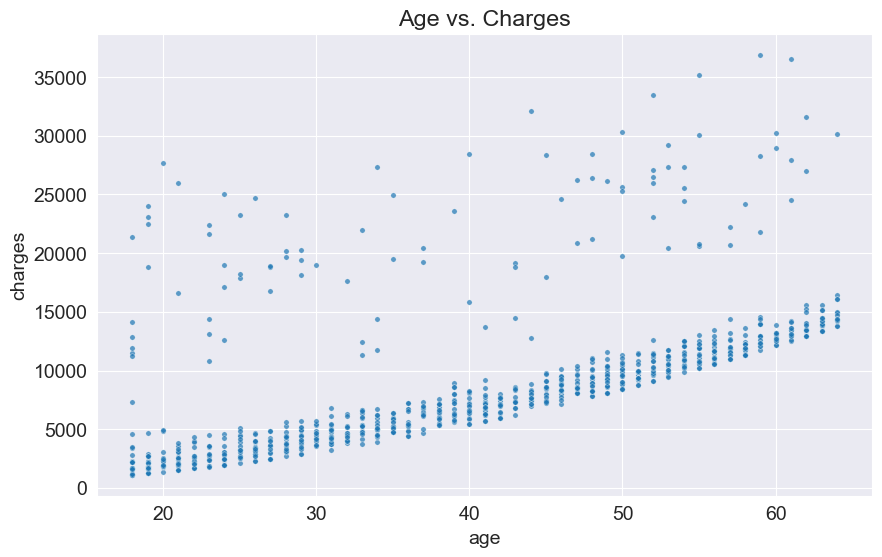

In [29]:
plt.title('Age vs. Charges')
# we don't need any interactivity in the chart so we can use seaborn scatterplot:
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

For the most part, the data seems to fall along a line that increases as age increases. A linear model age as its only feature would also generally follow this trend as well. 

Although we can't perfectly predict charges with a single feature (or even with all the features in the dataset), the point of a linear model is to make as accurate a <i>prediction</i> as possible. 

Our formula for this model would be as follows:

<i>y = wx + b</i>

where <i>w</i> is slope, <i>x</i> is the feature, and <i>b</i> is the intercept. We can make a function to calculate a given customer's charges based on their age:

In [30]:
def estimate_charges(age, w, b):
    return w * age + b

Now let's use the <i>estimate_charges</i> function to predict a customer's charges:

In [31]:
w = 50 # slope
b = 100 # intercept

print("Charges for a 30 year old customer:", estimate_charges(30, w, b))


Charges for a 30 year old customer: 1600


Based on the chart we estimated above, we can see that $1,600 is well below the actual charges for any 30 year old customer in our data. However, would this model be accurate for a 60 year old? what about a 20 year old? 

To test this we can create a vector of all ages in the non-smoker dataset and apply our model to each one: 

In [32]:
ages = non_smoker_df.age 
estimated_charges = estimate_charges(ages, w, b)

Now we can plot the estimated charges using a line graph:

Text(0, 0.5, 'Estimated Charges')

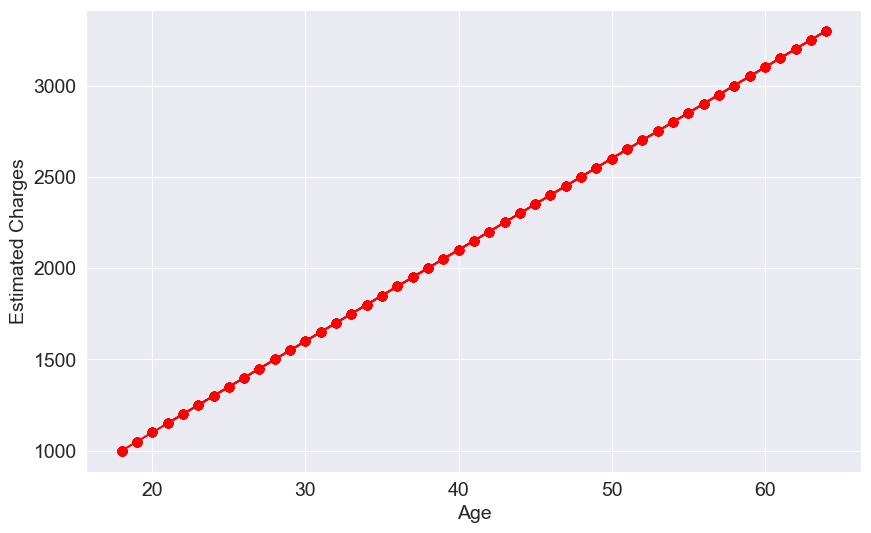

In [33]:
plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

We can see above that the points are on a straight line, which is to be expected for a linear model. 

However, our model's predictions are very inaccurate when compared to the data: 

In [34]:
# estimated charges
estimated_charges.head()

1    1000
2    1500
3    1750
4    1700
5    1650
Name: age, dtype: int64

In [35]:
# actual charges
non_smoker_df.charges.head()

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

We can see what our estimates look like in comparision to the actual data below:

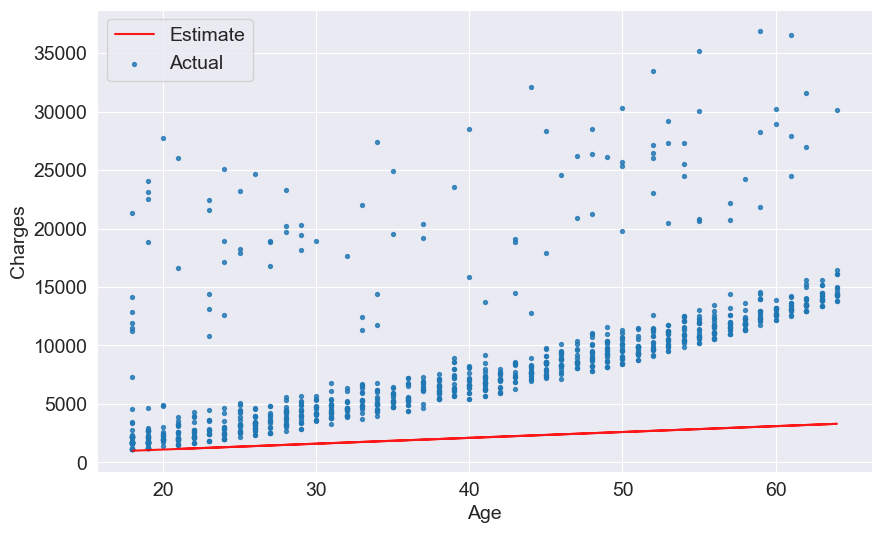

In [36]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9)

plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate','Actual'])

We can see that our intercept of 100 appears to be pretty accurate but our line does not grow at the same rate as the data meaning that our slope is to low. We need to adjust our model's paramters in order to create a more accurate model.

We can create a function to make the process of testing new model parameters simpler: 

In [37]:
def try_parameters(w, b):
    '''
    A function to test paramters on a model that estimates the annual medical charges of customers based on age
    and compares them to the actual data for customers. 

    'w' is the slope.
    'b' is the intercept.
    '''
    ages = non_smoker_df.age
    target = non_smoker_df.charges 
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)

    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate','Actual'])

Let's use this functinon to manipulate our model and see if we can get a better fit:

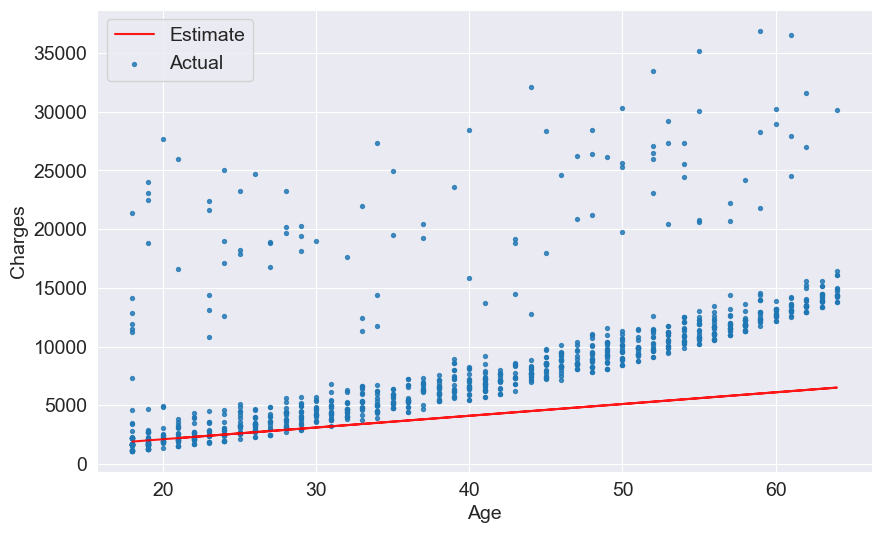

In [38]:
try_parameters(100, 100)

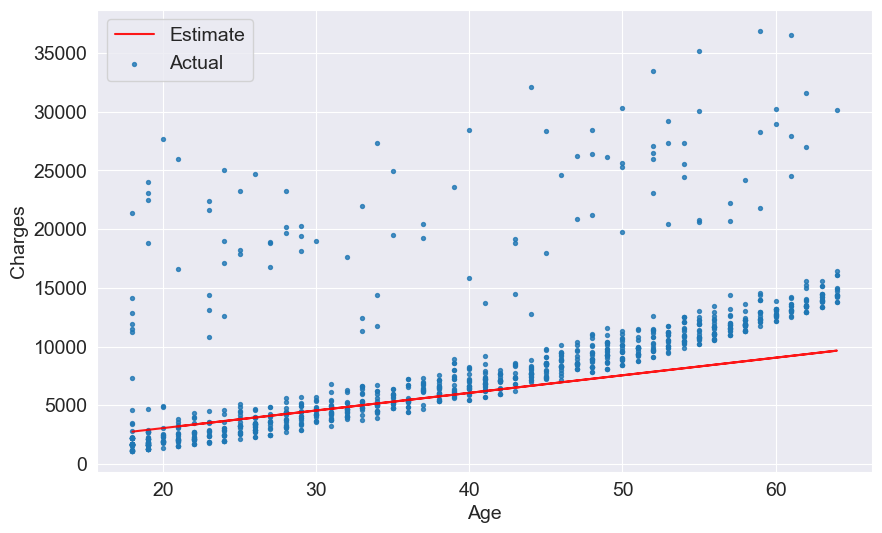

In [39]:
try_parameters(150, 50)

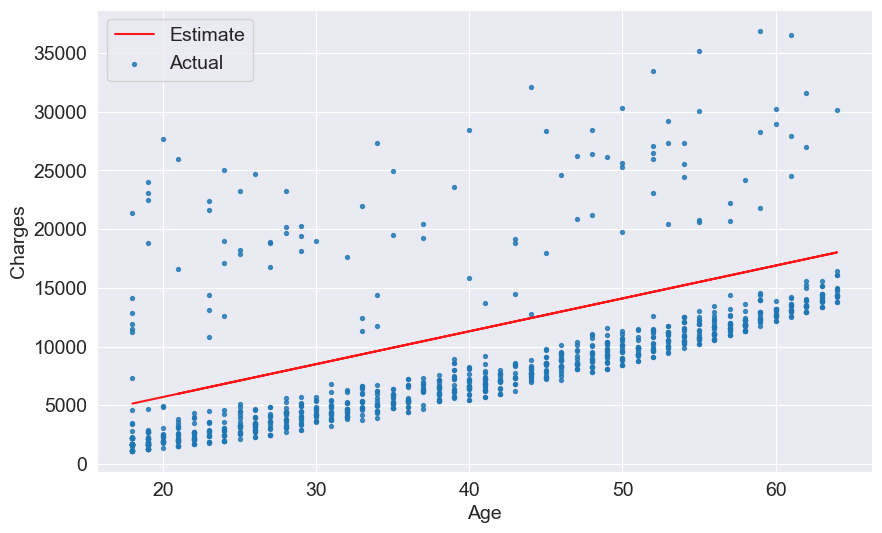

In [40]:
try_parameters(280, 100)

A slope of 280 and an intercept of 100 appear to be good paramters for our model. However, we might find better parameters if we kept testing over and over again slowly making our predictions more and more accurate. A machine is really good at repetitive mathematical calculations. But how does a machine decide what line is the best? We will have to look at standard scores that tell us how well our model fits to the data.

### Loss/Cost Function

The first loss function we will look at is root mean squared error (RMSE):

* First we need to subtract each prediction from the correpsonding target. This tells us the residual, or how far our prediction is from the target, for that point. 
* We then square the residuals to get rid of any negative numbers.
* We then get the average of all squared residuals. This entails summing all the residuals and dividing by N (number of residuals).
* We then take the square root of this calculation and that is our root mean squared error (RMSE). 

Let's find the RMSE for our model. We make a function that will perform the steps described above:

In [41]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

Lets compute the RMSE for our model with a slope (w) of 50 and an intercept (b) of 100:

In [42]:
w = 50
b = 100

What the regression line for our prediction looks like:

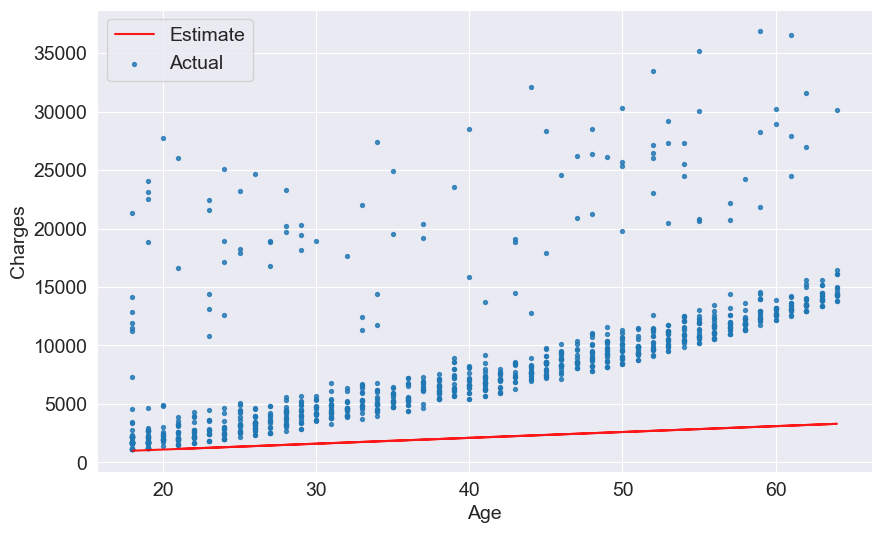

In [43]:
try_parameters(w, b)

In [44]:
targets = non_smoker_df['charges']
predictions = estimate_charges(non_smoker_df.age, w, b)

rmse(targets, predictions)

8461.949562575493

This means that each element differs from the actual target by $8,461 on average. This is called the loss because it indicates how bad the model is at predicting the target variables. We want the loss to be as low as possible in our model.

We can redefine the `try_paramters` function to display loss when we run it:

In [45]:
def try_parameters(w, b):
    '''
    A function to test paramters on a model that estimates the annual medical charges of customers based on age
    and compares them to the actual data for customers. 

    'w' is the slope.
    'b' is the intercept.
    '''
    ages = non_smoker_df.age
    target = non_smoker_df.charges 
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate','Actual'])

    loss = rmse(target, predictions)
    print('RMSE loss:', loss)

Now we can try fine tuning the model to get a better loss for our model:

RMSE loss: 8461.949562575493


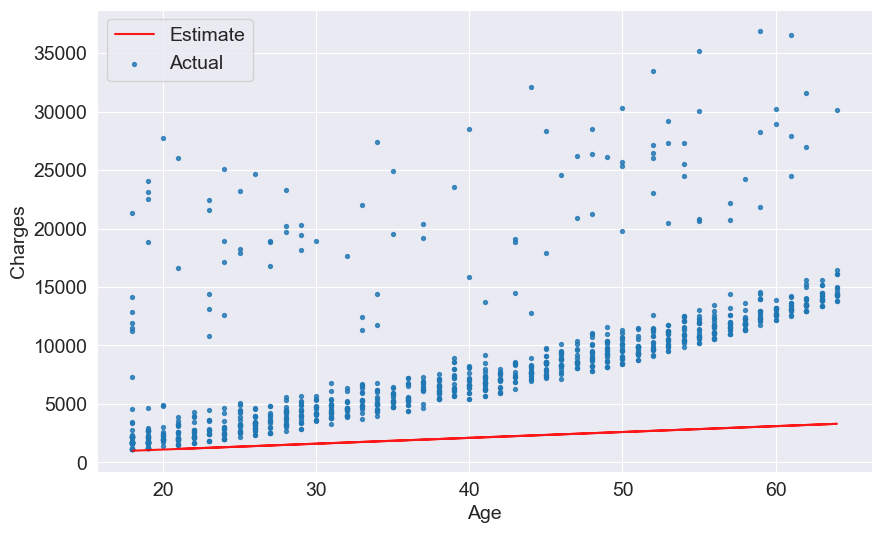

In [46]:
try_parameters(50, 100)

RMSE loss: 4685.875094546429


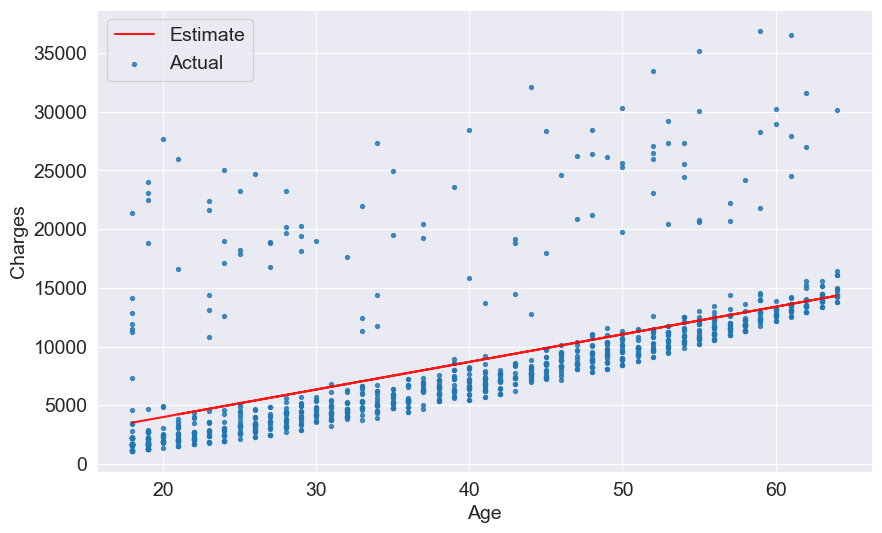

In [47]:
try_parameters(235, -710)

### Optimizer

Although we can keep guessing at what values we should use for slope and intercept, it would be best to work with some kind of a strategy to reduce the loss in our model. Two methods that we can use are:

* Ordinary least squares: computes best values for `w` and `b` using matrix operations. Very inefficient for larges datasets. 
* Stochastic gradient descent: starts with random values of `w` and `b` and slowly improves them using derivatives. Ideal for large datasets. 

Stochastic gradient descent (often just called gradient descent) is essentially what we were doing above where we start at a random point and adjust the paramters until our model's loss is minimized. 

Tuning our model to be as accurate as possible is very tedious for humans, so we can employ the help of a library called Scikit-Learn.


## Linear Regression with Scikit-Learn

Let's create a linear regression model with Scikit-Learn. You'll find that this process is extremely easier than what we've done above:

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression()

We've created the base for our linear model to be built off of. Now we need to fit it to our data using the `fit` method.

But what does the fit method require?

In [50]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



As we can see above, it can take in three paramters. `X` is our input variable(s) and `y` is our output variable. The `fit` method takes our input variables and fits the model to them so that they can accurately predict our output variable. 

Let's create our input and output (target):

In [51]:
inputs = non_smoker_df[['age']] # we need to use 2 sets of brackets because we need a dataframe, not a series
targets = non_smoker_df.charges

Now we can fit the data to our model:

In [52]:
model.fit(inputs, targets)

LinearRegression()

Now our model is fit to the data. As stated above, computers are much better at performing repetitve calculations so it took less than a second to find the best fit, where it might have taken us a long time to find the best fit. 

Let's look at the predictions for a few random ages (23, 37, 61) in the model using the `predict` method:

In [53]:
model.predict(np.array([[23], 
                        [37],
                        [61]]))

c:\Users\noahf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

Now we can have the model predict the charges for the entire model:

In [54]:
predictions = model.predict(inputs)
for i in predictions[:5]:
    print(i)

2719.0598743965074
5391.549002708504
6727.793566864502
6460.544654033303
6193.295741202104


Let's compare these with the actual targets:

In [55]:
targets.head()

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

Now we can use the RMSE function that we made above to evaluate the model:

In [56]:
rmse(targets, predictions)

4662.505766636395

Our RMSE indicates that our model is off by $4,600 on average, which is about as good as the score we achieved when we tuned the model ourselves. However, it too the computer much less time, something that will become more and more important as the datasets we work with get larger. 

Let's look at how far off our parameters were from the ideal parameters (remember that our predicted slope (w) above was 235 and our predicted intercept (b) was -710):

In [57]:
# w
model.coef_

array([267.24891283])

In [58]:
# b
model.intercept_

-2091.4205565650864

We were relatively close to the ideal slope but our intercept was pretty far off. However, the ideal model's loss wasn't hugely different from our manually tuned model (4662 vs 4685). It would have taken us a while to discover this ideal loss on our own, so we can see why utilizing libraries like Scikit-Learn is so important. 

Let's use the `try_parameters` function to plot the w and b from the ideal model:

RMSE loss: 4662.505766636395


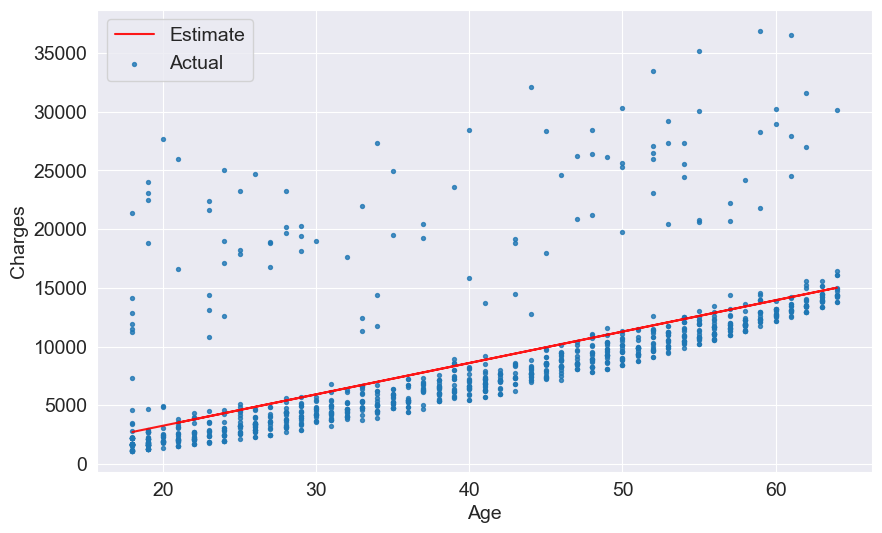

In [59]:
try_parameters(model.coef_, model.intercept_)

This is the best possible fit we can get using the age variable on this data. 

I will run through a few other models from Scikit-Learn's `linear_model` library. The steps will be similar to those above minus the step that looks at values for the first five observations.

### Regression Using Gradient Descent

The standard `LinearRegression` class in Scikit-Learn uses the least squares method to determine model fit. However, you can use other methods to see if a better model can be reached. We can use the `SGDRegressor` to apply the gradient descent method on our model: 

In [60]:
from sklearn.linear_model import SGDRegressor

In [61]:
sdg_model = SGDRegressor()
sdg_model.fit(inputs, targets)
sdg_predictions = sdg_model.predict(inputs)

Now that we've created our gradient descent model, let's compare the predictions to the actual values:

In [62]:
for i in sdg_predictions[:5]:
    print(i)

1023.1578563205621
3888.9052395062845
5321.778931099145
5035.204192780573
4748.629454462001


In [63]:
targets.head()

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

The outliers appear to have a much greater effect on the predictions versus when we used the least squares method. 

We can also check the RMSE and line of best fit for the model:

RMSE loss: 4843.352575433545


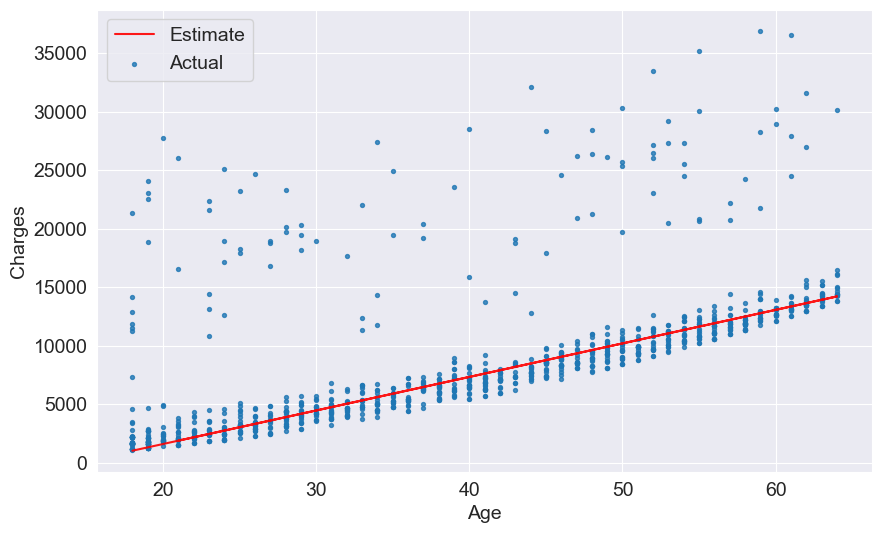

In [64]:
try_parameters(sdg_model.coef_, sdg_model.intercept_)

All the outliers forced the line up, meaning that its closer to the outliers but further from the main cluster. This makes the model better at predicting the values of outliers but worse at predicting the majority of the data points. 

### Ridge

In [65]:
from sklearn.linear_model import Ridge

In [66]:
ridge = Ridge(alpha=1)
ridge.fit(inputs, targets)
ridge_predictions = ridge.predict(inputs)

RMSE loss: 4662.505766670536


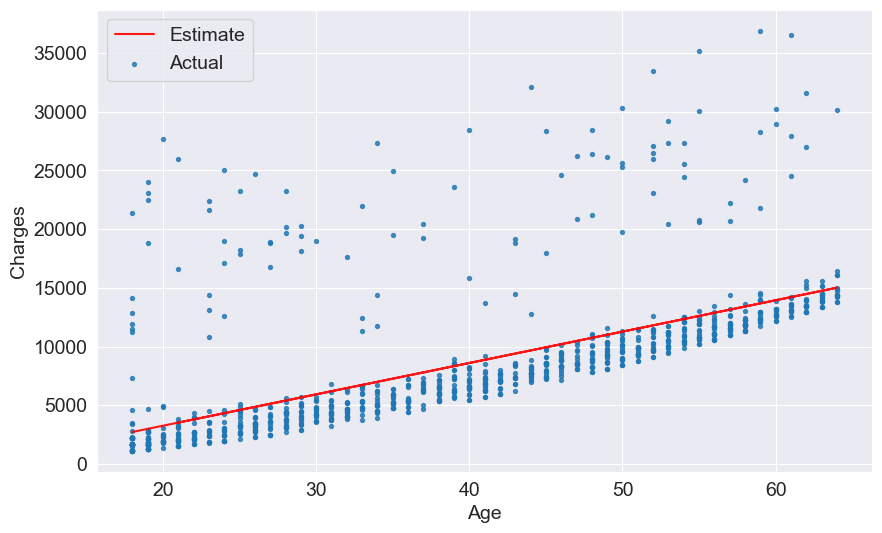

In [67]:
try_parameters(ridge.coef_, ridge.intercept_)

The predictions and RMSE is the same for the least squares and ridge methods.

### Lasso

In [68]:
from sklearn.linear_model import Lasso

In [69]:
lasso = Lasso(alpha=0.5)
lasso.fit(inputs, targets)
lasso_predictions = lasso.predict(inputs)

RMSE loss: 4662.50576677169


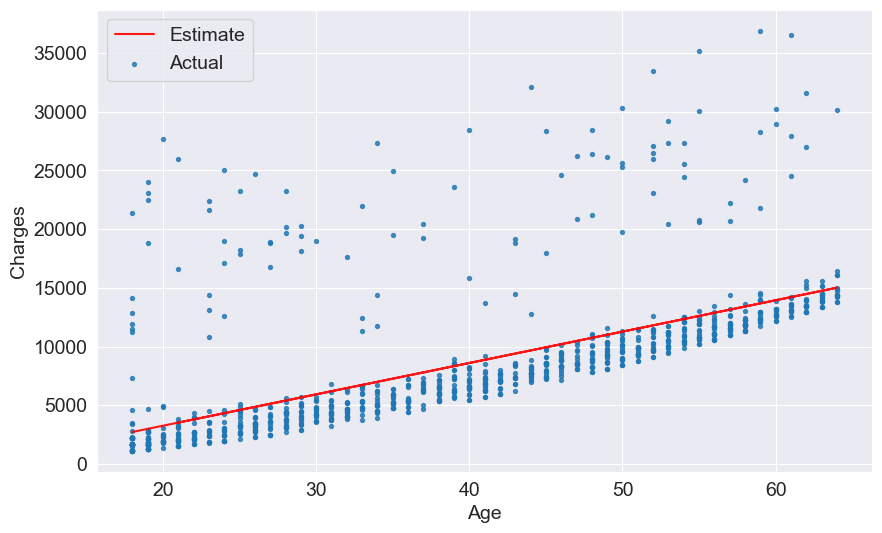

In [70]:
try_parameters(lasso.coef_, lasso.intercept_)

Once again the RMSE and line of best fit are the same least squares and lasso methods.

It seems like the standard least squares method gave us the best fit for our data, but this might not always be the case. Different data and problems will require different models. It is our jobs as data scientists to utilize the best tools for the job at hand. 

### Least Squares Regression on the Smoker Dataframe

Up until this point all of our models have been utlizing the non-smoker dataframe, but now we can create a dataframe for the smoking customers and create a model to predict charges based on age:

In [71]:
smoker_df = medical_df[medical_df.smoker == 'yes']

inputs = smoker_df[['age']]
targets = smoker_df.charges

In [72]:
def try_parameters_smoker(w, b):
    '''
    A function to test paramters on a model that estimates the annual medical charges of customers based on age
    and compares them to the actual data for customers. 

    'w' is the slope.
    'b' is the intercept.
    '''
    ages = smoker_df.age
    target = smoker_df.charges 
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate','Actual'])

    loss = rmse(target, predictions)
    print('RMSE loss:', loss)

In [73]:
model = LinearRegression()
model.fit(inputs, targets)
predictions = model.predict(inputs)

In [74]:
for i in predictions[:5]:
    print(i)

26093.642567002717
39218.85945772535
28535.543383881348
29451.256190210832
30672.206598650147


In [75]:
targets.head()

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

RMSE loss: 10711.00334810241


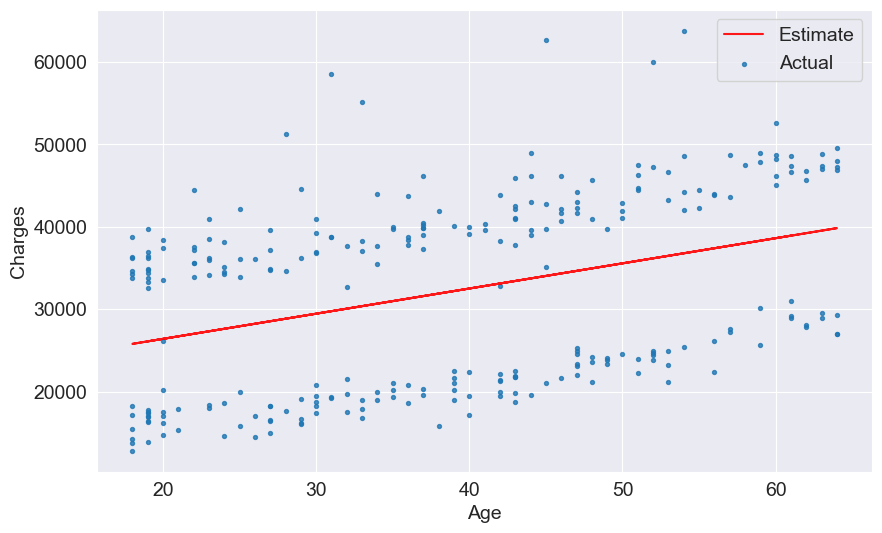

In [76]:
try_parameters_smoker(model.coef_, model.intercept_)

This data was more difficult to predict because the data is fairly evenly distributed into two groups. As we can see, the line is between both groups with very few points falling on/close to it. This means that our model won't be able to accurately predict either cluster.   

## Machine Learning

Machine learning is essentially glorified line-fitting. We are trying to slowly get to the prediction closer and closer to the line of best fit. 

Let's run through the process one more time in its simplest form:

In [77]:
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 4662.505766636395


## Multiple Linear Regression

So far we've only used one variable (age) in our model to make predictions. This is called simple linear regression. However, the model hasn't been great at predicting charges accurately. That's because only using the age variable doesn't take other things into account, like a customer's BMI. 

In this section we will build a model using multiple linear regression, a linear regression model that uses more than 1 input variable. The equation for this model will look like this:

$charges = w_1 \times age + w_2 \times bmi + b$

Although you might think that the switch from simple to multiple linear regression would be complicated, its actually almost identical to the model we made above, with one change; we will add the `bmi` column from our dataset to the inputs:

In [78]:
inputs = non_smoker_df[['age', 'bmi']]

Now we can build the rest of the model just like we did above:

In [79]:
targets = non_smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 4662.3128354612945


The loss decreases by less than 0.2. Why is this? well if we run our correlation matrix again, we can see that BMI has a weak correlation with charges for non-smokers: 

Text(0.5, 1.0, 'Correlation Matrix')

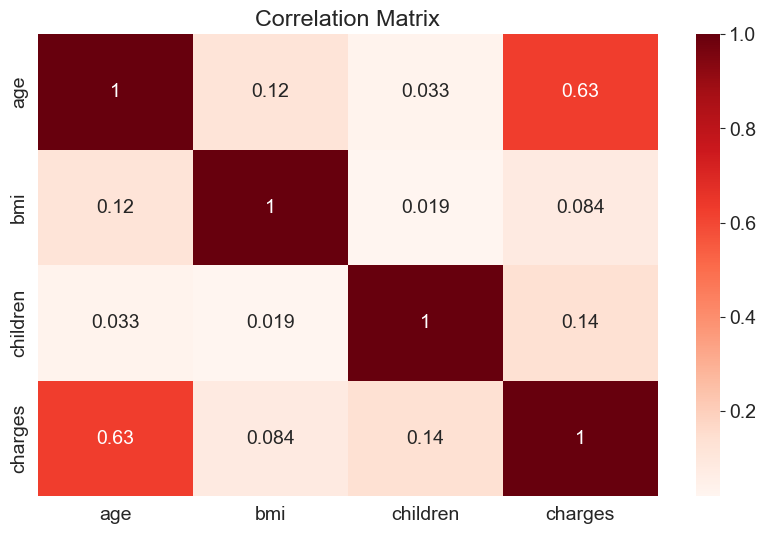

In [80]:
sns.heatmap(non_smoker_df[['age', 'bmi', 'children', 'charges']].corr(), cmap="Reds", annot=True)
plt.title("Correlation Matrix")

However, BMI is highly correlated with charges for smokers:

Text(0.5, 1.0, 'Correlation Matrix')

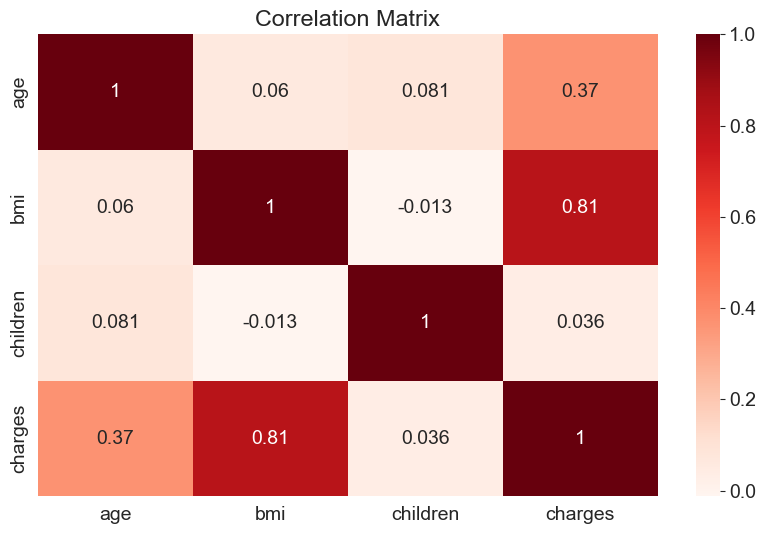

In [81]:
sns.heatmap(smoker_df[['age', 'bmi', 'children', 'charges']].corr(), cmap="Reds", annot=True)
plt.title("Correlation Matrix")

Sometimes input variables have little to no effect on the outcome variable, which is the case for BMI among non-smokers. 

Let's look at the correlation between children and charges among non-smokers:

In [82]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542205

Once again, this correlation is pretty low. We can also view the relationship between these two variables in a graph:

In [83]:
fig = px.strip(non_smoker_df, x='children', y='charges', title='Children vs. Charges')
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

We can see a slightly increasing trend (charges increase as number of children increases). Let's rebuild our model and add children as an input variable:

In [84]:
inputs, targets = non_smoker_df[['age','bmi','children']], non_smoker_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 4608.470405038246


The loss for our model has actually decreases, from $4,662 to $4,608. This decrease isn't huge, but it is a decrease nonetheless. 

Let's use the same inputs to create a model for predicting charges among smokers. Remember that our loss for the smoker model we made above was $10,711, so let's see how much this decreases by when we add BMI and number of children: 

In [85]:
inputs, targets = smoker_df[['age','bmi','children']], smoker_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 5718.202480524154


With a loss of $5,718, our multiple regression model performs significantly better than the simple linear model that only used age as an input. 

## Using the Entire Dataset

Now that we've made it this far, let's create a multiple linear model for the entire dataset (both smokers and non-smokers):

In [86]:
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 11355.317901125973


### Adding Smoker to Model

In order to use the categorical variable 'smoker', we need to convert the text data (yes, no) to numbers (1, 0) in order to work with our model. We can either do this with the `np.where` method or with Pandas' `map` function. I will demonstrate both below: 

In [87]:
# np.where
medical_df['smoker_bin'] = np.where(medical_df['smoker'] == 'yes', 1, 0)

# pd.map
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_bin,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0


As you can see above, both methods achieve the same results. We will use the 'smoker_code' column in our regression, but we can use either one: 

In [88]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 6056.439217188081


With the addition of the smoker variable, we can see that our model's loss has gone from $11,355 to $6,056, which is a massive improvement. This change is due to the fact that charges for smoker differ significantly from the charges for non-smokers. 

### Adding Sex Variable to Model

We can also add sex (another categorical variable) to the model. We will use Pandas' `map` function, but Numpy's `where` function would also work:

In [89]:
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_bin,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,0,1


In [90]:
medical_df.charges.corr(medical_df.sex_code)

0.05729206220202533

In [91]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 6056.100708754546


As the correlation coefficient indicates, sex has very little effect on the model's loss. 

### Adding Region to Model

We can also add the region variable to model to see if customers from certain regions have different charges. 

In [92]:
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])

one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot = np.array(one_hot, dtype=int) 

medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_bin,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,1,0,1,0,0


In [93]:
medical_df[['charges', 'northeast','northwest','southeast','southwest']].corr()

,charges,northeast,northwest,southeast,southwest
charges,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


In [94]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast','northwest','southeast','southwest']
inputs, targets = medical_df[input_cols], medical_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 6041.6796511744515


Even after adding all the variable to our model we still have a loss of $6,042. This is mainly due to how spread out the data is. If we look back at a chart from earlier, we can see this:

In [95]:
px.scatter(medical_df, x='age', y='charges', color='smoker')

### Two Models: Smoker and Non-Smoker

Could creating two seperate linear models, one for smokers and one for non-smokers, give us a better loss score than one linear model for both? Let's find out. First we will perform all the changes to the smoker dataframe so we can create a model around it:

In [96]:
# create a binary smoker column
smoker_codes = {'no': 0, 'yes': 1}
smoker_df['smoker_code'] = smoker_df.smoker.map(smoker_codes)

# create a binary sex column
sex_codes = {'female': 0, 'male': 1}
smoker_df['sex_code'] = smoker_df.sex.map(sex_codes)

# perform one-hot encoding on the region column
enc = preprocessing.OneHotEncoder()
enc.fit(smoker_df[['region']])

one_hot = enc.transform(smoker_df[['region']]).toarray()
one_hot = np.array(one_hot, dtype=int) 

smoker_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

# view the dataset
smoker_df.head()

C:\Users\noahf\AppData\Local\Temp\ipykernel_2116\668796988.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\noahf\AppData\Local\Temp\ipykernel_2116\668796988.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\noahf\AppData\Local\Temp\ipykernel_2116\668796988.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.90,0,yes,southwest,16884.9240,1,0,0,0,0,1
11,62,female,26.29,0,yes,southeast,27808.7251,1,0,0,0,1,0
14,27,male,42.13,0,yes,southeast,39611.7577,1,1,0,0,1,0
19,30,male,35.30,0,yes,southwest,36837.4670,1,1,0,0,0,1
23,34,female,31.92,1,yes,northeast,37701.8768,1,0,1,0,0,0


Now we can create a model on the smoker dataframe:

In [97]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast','northwest','southeast','southwest']
inputs, targets = smoker_df[input_cols], smoker_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 5668.4678821121515


We can see that the loss for this model is better than the original model. 

Now let's do the same thing for the smoker dataframe:

In [ ]:
# create a binary smoker column
smoker_codes = {'no': 0, 'yes': 1}
non_smoker_df['smoker_code'] = non_smoker_df.smoker.map(smoker_codes)

# create a binary sex column
sex_codes = {'female': 0, 'male': 1}
non_smoker_df['sex_code'] = non_smoker_df.sex.map(sex_codes)

# perform one-hot encoding on the region column
enc = preprocessing.OneHotEncoder()
enc.fit(non_smoker_df[['region']])

one_hot = enc.transform(non_smoker_df[['region']]).toarray()
one_hot = np.array(one_hot, dtype=int) 

non_smoker_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

# view the dataset
non_smoker_df.head()

And now we can create the model:

In [99]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast','northwest','southeast','southwest']
inputs, targets = non_smoker_df[input_cols], non_smoker_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 4573.074988795492


This model's loss is nearly $1,500 less than the original model. This is a massive improvement. It seems that when we get new data, we should split smokers and non-smokers into seperate groups so we can get more accurate results. 

Let's say that a smoking customer comes to us and asks "how did you calculate my insurance premium?". We could say that we put their information into our machine learning model and that was the result we got. But they probably won't be satisfied with this answer. They'll want to know what specifically about their medical situation justified their premium. 

Let's look at how we determine this. First, let's re-train the model for the entire dataset (smokers and non-smokers):

In [100]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast','northwest','southeast','southwest']
inputs, targets = medical_df[input_cols], medical_df.charges

model = LinearRegression().fit(inputs, targets)

Now we can look at the coefficients for the model:

In [101]:
# pd.reset_option('display.float_format')
# pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.reset_option('display.float_format')

weights_df = pd.DataFrame({
    'feature': input_cols,
    'weight': np.round(model.coef_, 6)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756


Now we can see the weight applied to each variable. Being a smoker increases a customers charges by $23,848. But wait, age had a higher correlation with charges than BMI. Why does BMI have a greater effect on charges than age? This is because the weight of each feature is the change in charges with a <b> one unit</b> increase in that feature. This means that a customer who is 40 really has a $40 \times 256$, or \$10,240, of their charges accounted for due to age. And if this customer has a BMI of 20, then they would have $20 \times 339$, or $6,780, accounted for due to BMI.

Hopefully the dataframe below can shed a little more light on what's happenning here. As an example to show the actuals for a customer, we'll use the first customer in the dataset:

In [102]:
medical_df[input_cols].head(1)

,age,bmi,children,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,27.9,0,1,0,0,0,0,1


In [103]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast','northwest','southeast','southwest']

weights_df = pd.DataFrame({
    'feature': input_cols,
    'weight': np.round(model.coef_, 6),
    'actuals': medical_df[input_cols].iloc[0, :],
    "weighted charges": model.coef_ * medical_df[input_cols].iloc[0, :]
})
weights_df.reset_index().drop(columns='index')

,feature,weight,actuals,weighted charges
0,age,256.856353,19.0,4880.270698
1,bmi,339.193454,27.9,9463.497356
2,children,475.500545,0.0,0.000000
3,smoker_code,23848.534542,1.0,23848.534542
4,sex_code,-131.314359,0.0,-0.000000
5,northeast,587.009235,0.0,0.000000
6,northwest,234.045336,0.0,0.000000
7,southeast,-448.012814,0.0,-0.000000
8,southwest,-373.041756,1.0,-373.041756


Columns that have different ranges can make comparisons difficult. Although the southwest region has a higher weight than age or BMI, it only has a range of 1 (1 - 0). Both age and BMI have ranges much greater than that of southwest (46 and 37 respectively). We need to weigh each of these variables differently because their ranges differ so much. 

We can do this through a process called standardization, or scaling the columns so that they are comparable. We can do this below using Scikit-Learn's StandardScaler library:

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [112]:
scaler.mean_, scaler.var_

(array([39.20702541, 30.66339686,  1.09491779]),
 array([197.25385199,  37.16008997,   1.45212664]))

We can then apply this scaler to the dataset:

In [111]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

We can combine our scaled numeric variables with our categorical variables:

In [113]:
cat_cols = ['smoker_code','sex_code','northeast','northwest','southeast','southwest']
categorical_data = medical_df[cat_cols].values # isolates the categorical columns

And we can train our model on the scaled values:

In [114]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 6041.679651174452


In [120]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight',ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


That's all for this notebook. Thank you for reading. 